In [11]:
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [6]:
import pandas as pd

In [25]:
df = pd.read_csv(r"C:\Users\user\Downloads\Telegram Desktop\df_final.csv")
df

,Name,measurement_error,measurement_method,raw_value_clean,normalised_name,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds_x,...,piPC1,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9
0,silicate,0.04,snowball,1.1700,[O-][Si]([O-])([O-])[O-],91.958779,92.082,4.0,0.0,0.0,...,1.609438,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,BSG,0.00,el_mylogic,1.4100,[B-](CNS(=O)(=O)CC1=CC=C(C=C1)C(=O)O)(O)(O)O,290.051127,290.082,8.0,5.0,6.0,...,3.258097,4.466626,3.860730,4.029806,4.464470,4.956267,4.963718,5.229101,5.372090,4.298135
2,silica,0.00,snowball,1.4800,O=[Si]=O,59.966756,60.084,2.0,0.0,0.0,...,1.609438,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,DMF,0.00,el_mylogic,1.4305,CN(C)C=O,73.052764,73.095,2.0,0.0,1.0,...,1.791759,0.000000,1.791759,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,silica,0.00,snowball,1.4600,O=[Si]=O,59.966756,60.084,2.0,0.0,0.0,...,1.609438,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,Tetradecyl acetate,0.00,el_cde_tables,1.4362,CCCCCCCCCCCCCCOC(=O)C,256.240230,256.430,2.0,0.0,13.0,...,2.944439,2.302585,2.995732,2.833213,2.772589,2.708050,2.639057,2.564949,2.484907,2.397895
2326,BPA,0.00,el_mylogic,1.3000,CC(C)(C1=CC=C(C=C1)O)C2=CC=C(C=C2)O,228.115030,228.291,2.0,2.0,2.0,...,3.218876,6.196030,3.828641,4.350278,4.826312,5.364222,5.410529,5.537826,5.668371,5.901266
2327,carbon,0.40,el_cde_tables,2.4000,C,16.031300,16.043,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2328,hydrogen,0.00,snowball,2.3500,[HH],2.015650,2.016,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
df = df.dropna()

In [27]:
str_cols = [col for col in df.columns if df[col].dtype == 'object']

In [28]:
str_cols

['Name',
 'measurement_method',
 'normalised_name',
 'MolecularFormula',
 'CanonicalSMILES',
 'IsomericSMILES',
 'InChI',
 'InChIKey',
 'IUPACName']

In [29]:
#Divide data into X - numeric descriptors and Y - target
X = df.drop(['Name',
 'measurement_method',
 'normalised_name',
 'MolecularFormula',
 'CanonicalSMILES',
 'IsomericSMILES',
 'InChI',
 'InChIKey',
'IUPACName', 'raw_value_clean'],axis=1)
Y = df['raw_value_clean']

#Scale X in range [0, 1]
X_norm = MinMaxScaler().fit_transform(X)

In [30]:
#Binarize Y
bins = np.linspace(round(Y.min(),0)-1, round(Y.max(),0)+1, num = 6)
Y_labels = np.digitize(Y, bins)

In [31]:
#Perform LDA
lda = LDA()
X_lda = lda.fit_transform(X_norm,Y_labels)

#Print number of components
X_lda.shape

(1446, 2)

In [33]:
#Perform LDA with 4 components
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_norm,Y_labels)

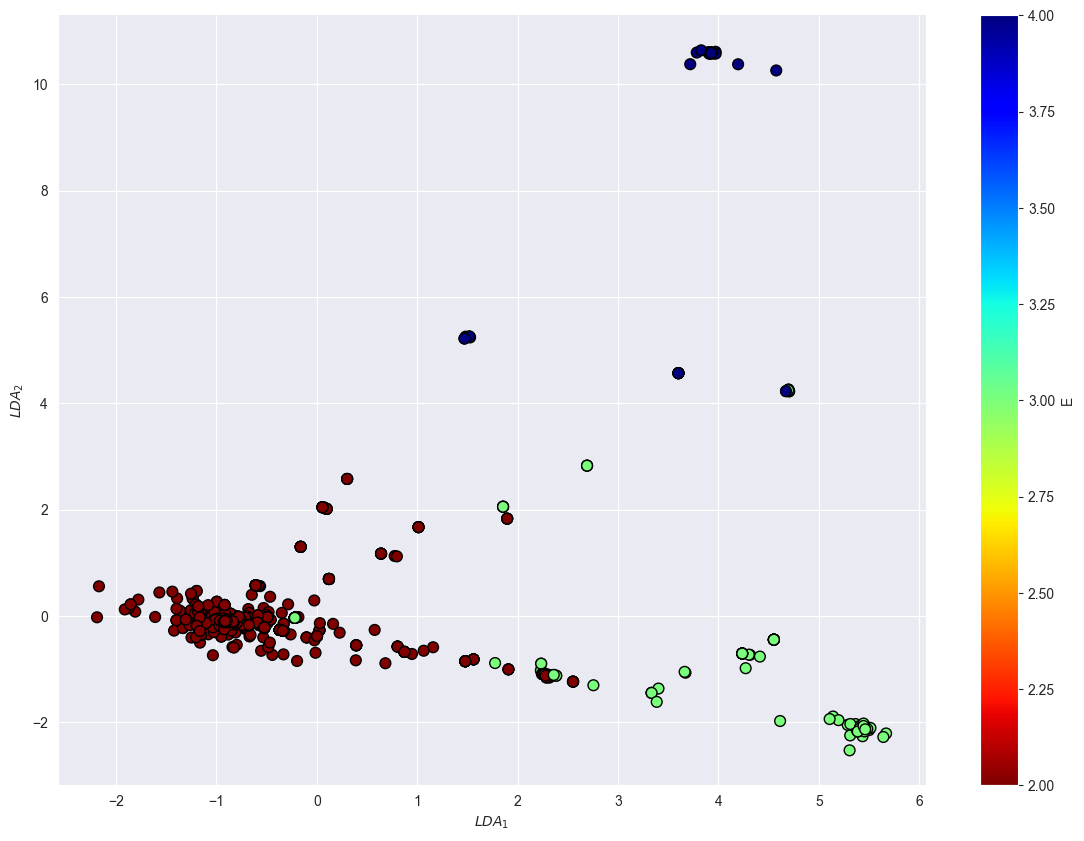

In [34]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], c = Y_labels, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$LDA_1$')
plt.ylabel(r'$LDA_2$')
sns.despine()
plt.show()

In [35]:
#Print explained variance
lda.explained_variance_ratio_.sum()

1.0

LDA объясняет 100% исходной дисперсии с помощью 2 компонентов и позволяет разделять и визуализировать целевые метки.

ICA (Independent Component Analysis)

In [36]:
#Import required libraries
from sklearn.decomposition import FastICA

In [37]:
#Perform ICA with 2 components
ica = FastICA(n_components = 2)
X_ica = ica.fit_transform(X_norm)

C:\Users\user\PycharmProjects\pythonProject4\venv\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


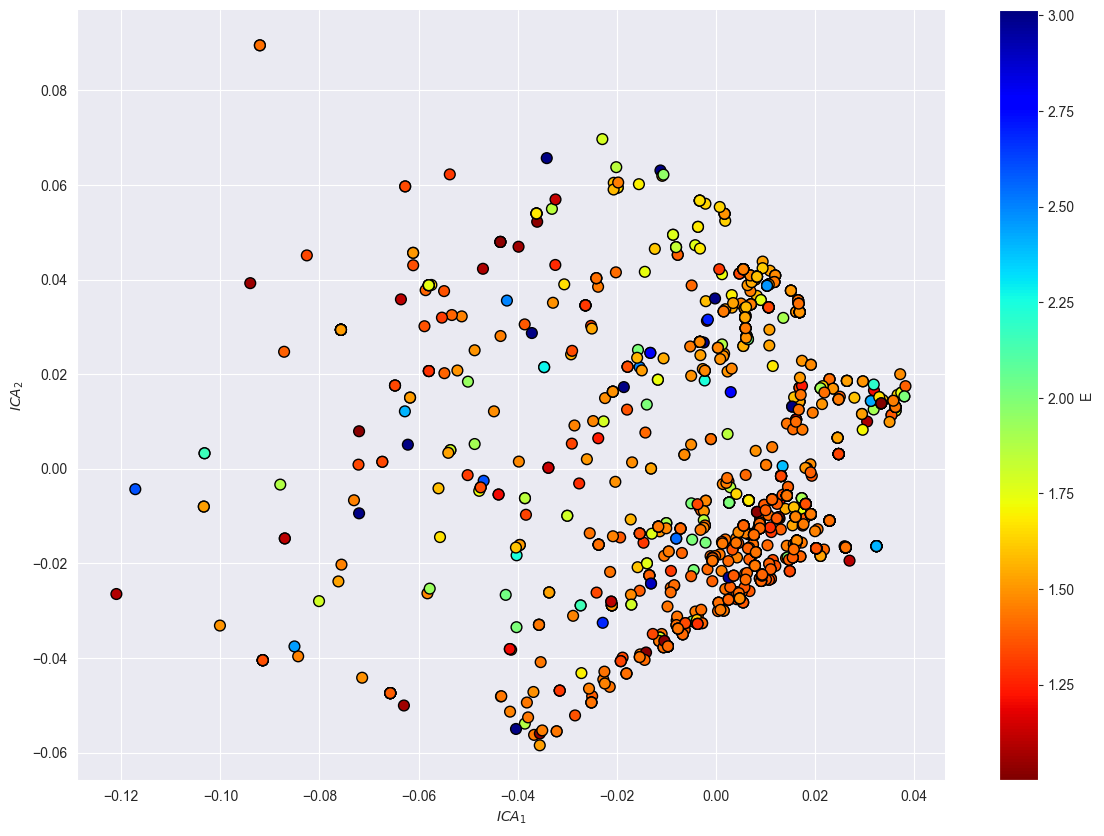

In [38]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_ica[:, 0], X_ica[:, 1], c = Y, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$ICA_1$')
plt.ylabel(r'$ICA_2$')
sns.despine()
plt.show()